In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)






data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [3]:
# label_encoder = LabelEncoder()
# data_train['label'] = label_encoder.fit_transform(data_train['label'])
# data_test['label']=label_encoder.transform(data_test['label'])
# data_val['label']=label_encoder.transform(data_val['label'])





In [4]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,fake,-298.976257,35.133751,-22.843426,-5.864401,-36.326511,-36.527996,-24.010029,-14.284536,-18.137291,...,0.013023,1.527017,1.501882,4.629135,1.818691,4.379017,-1.082293,-0.369213,-5.067110,-6.520721
1,fake,-297.897675,30.627979,-12.429846,-17.079077,-35.054970,-39.867123,-19.294991,-4.695670,-18.443432,...,-2.322263,2.650555,0.998400,3.480047,1.862481,4.355821,-1.299628,-0.024301,-5.491709,-4.992930
2,fake,-309.786926,48.008373,-20.613346,-6.874487,-33.211926,-46.287495,-24.077480,-13.334648,-16.689102,...,-1.011088,2.701730,2.529477,5.409292,2.198545,2.999749,-1.114971,-0.272579,-5.045567,-5.816518
3,fake,-289.759979,42.016392,-10.604426,-6.311156,-22.476442,-30.906607,-29.894197,-9.249873,-6.369984,...,-1.040954,3.839497,1.557502,3.229818,1.632407,1.792760,0.252962,0.386413,-4.390786,-5.100022
4,fake,-322.633759,36.436901,-19.441750,-12.020472,-30.916821,-31.231535,-30.693113,-13.826791,-14.764235,...,-2.835537,1.111644,-0.510021,4.268329,1.615109,3.822169,-1.408335,-1.099285,-5.089640,-6.225005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-278.826630,31.783283,-14.816895,-3.870162,-31.204700,-42.247559,-27.623472,-9.236441,-13.146837,...,-3.003298,1.932312,1.258123,3.765268,1.163506,2.642422,-3.684593,-1.397242,-5.227495,-5.749261
117889,fake,-299.871216,46.852303,-17.741161,-10.119554,-36.539722,-36.170414,-28.401104,-10.084669,-4.600228,...,-2.468412,3.455370,1.525531,4.120927,0.738690,2.135150,-1.342242,-2.483320,-4.869510,-6.165032
117890,fake,-365.767181,38.606941,-12.483649,-15.349252,-20.887281,-8.077003,-14.179826,-1.810470,-10.929688,...,-2.063618,-2.333240,-5.197758,-5.741199,-7.030386,-5.865938,-6.386530,-3.659228,-4.825936,-3.038006
117891,fake,-411.078888,36.046673,-1.801920,-9.390966,-19.115017,-10.603668,-15.074116,3.123980,-13.793839,...,-4.120661,-3.331578,-5.060300,-5.168928,-6.253524,-7.065341,-7.861663,-5.789011,-5.009384,-2.866058


In [5]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [6]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [7]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1843/1843 [==============================] - 14s 6ms/step - loss: 0.2783 - accuracy: 0.9099 - val_loss: 0.2512 - val_accuracy: 0.9120
Epoch 2/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2268 - accuracy: 0.9180 - val_loss: 0.2001 - val_accuracy: 0.9245
Epoch 3/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1786 - accuracy: 0.9331 - val_loss: 0.1668 - val_accuracy: 0.9355
Epoch 4/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1564 - accuracy: 0.9409 - val_loss: 0.1428 - val_accuracy: 0.9465
Epoch 5/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1435 - accuracy: 0.9457 - val_loss: 0.1461 - val_accuracy: 0.9453
Epoch 6/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1343 - accuracy: 0.9494 - val_loss: 0.1313 - val_accuracy: 0.9510
Epoch 7/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1267 - accuracy: 0.9519 - val_loss: 0.1279 -

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.2515 - accuracy: 0.9541 - 1s/epoch - 3ms/step
Test Accuracy: 95.41%


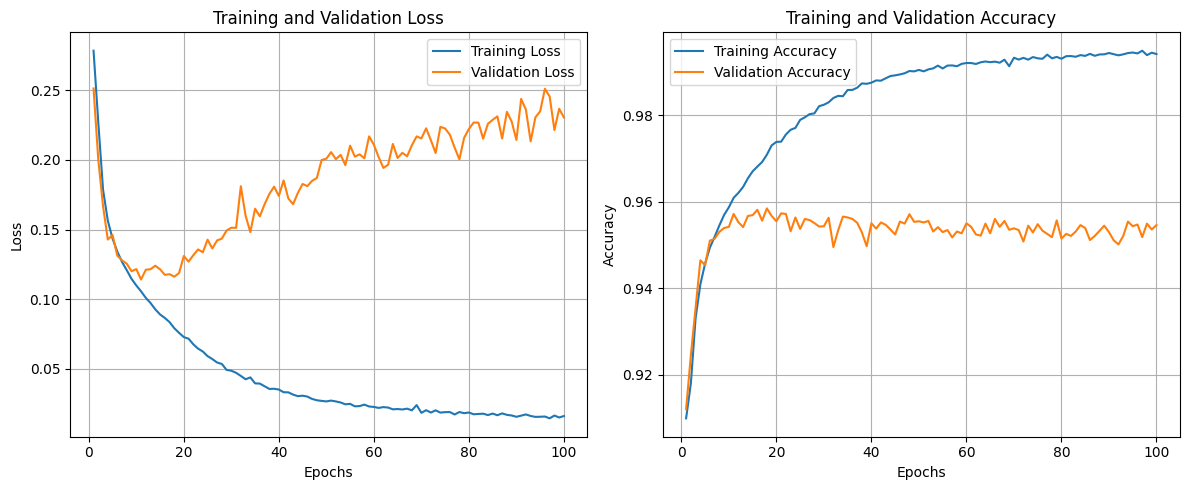

In [9]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 70.81%


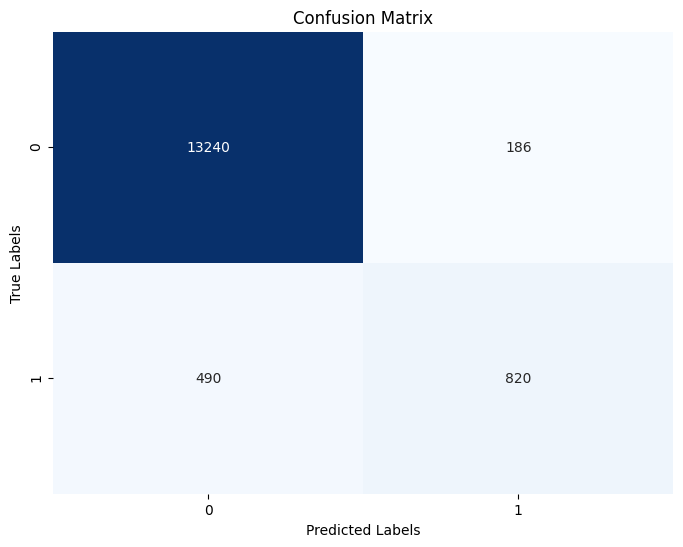

In [10]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test),axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test),axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,0,1
14734,1,0


# eraly stopping

In [13]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])



Epoch 1/100
1843/1843 [==============================] - 14s 7ms/step - loss: 0.2745 - accuracy: 0.9108 - val_loss: 0.2567 - val_accuracy: 0.9129
Epoch 2/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2322 - accuracy: 0.9165 - val_loss: 0.2069 - val_accuracy: 0.9229
Epoch 3/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1910 - accuracy: 0.9282 - val_loss: 0.1738 - val_accuracy: 0.9307
Epoch 4/100
1843/1843 [==============================] - 11s 6ms/step - loss: 0.1645 - accuracy: 0.9376 - val_loss: 0.1499 - val_accuracy: 0.9429
Epoch 5/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1460 - accuracy: 0.9449 - val_loss: 0.1493 - val_accuracy: 0.9434
Epoch 6/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1349 - accuracy: 0.9489 - val_loss: 0.1369 - val_accuracy: 0.9512
Epoch 7/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1264 - accuracy: 0.9525 - val_loss: 0.1358 -

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1748 - accuracy: 0.9524 - 1s/epoch - 3ms/step
Test Accuracy: 95.24%


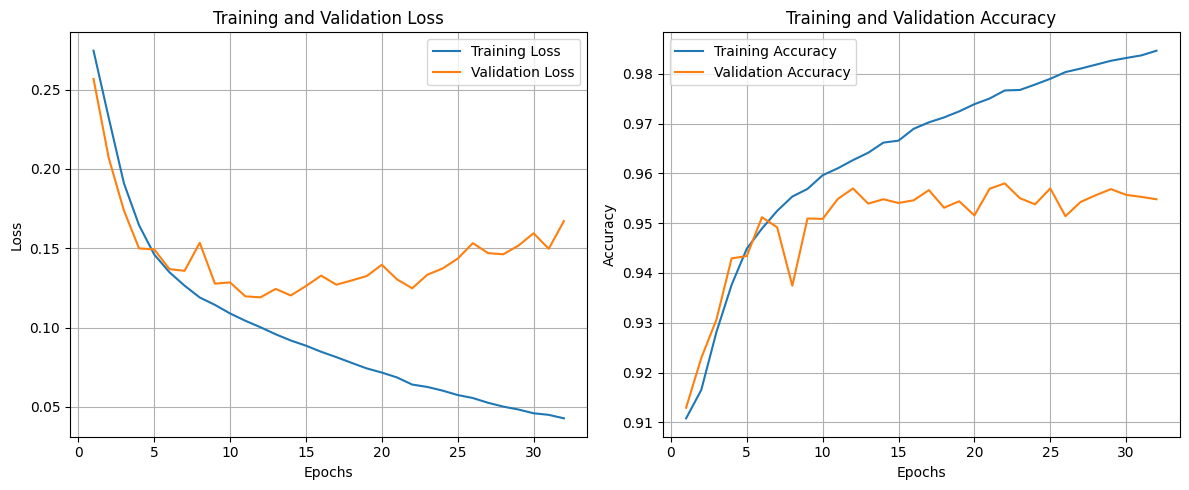

In [15]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




461/461 [==============================] - 1s 2ms/step
Test f1_score : 71.83%


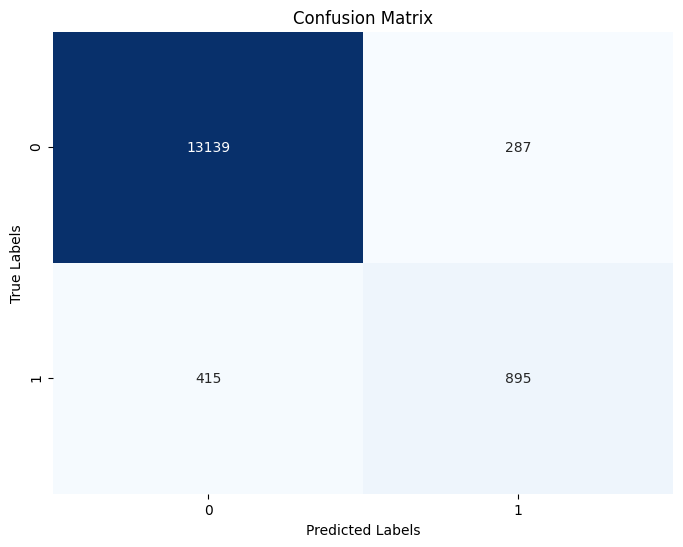

In [16]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
